In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basic functions

In [2]:
from ch1 import square
from ch1 import leaky_relu
from ch1 import deriv

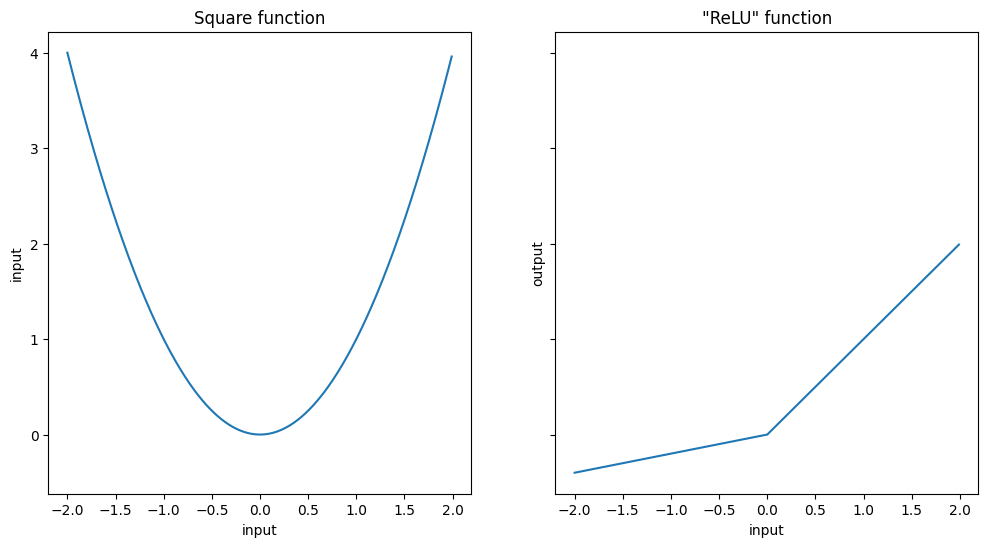

In [3]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

input_range = np.arange(-2, 2, .01)
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('input')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')
plt.show()

## Chain(嵌套函数)

In [4]:
from ch1 import chain_length_2

## Chain derivative(链式法则)

In [5]:
from ch1 import sigmoid
from ch1 import plot_chain
from ch1 import plot_chain_deriv

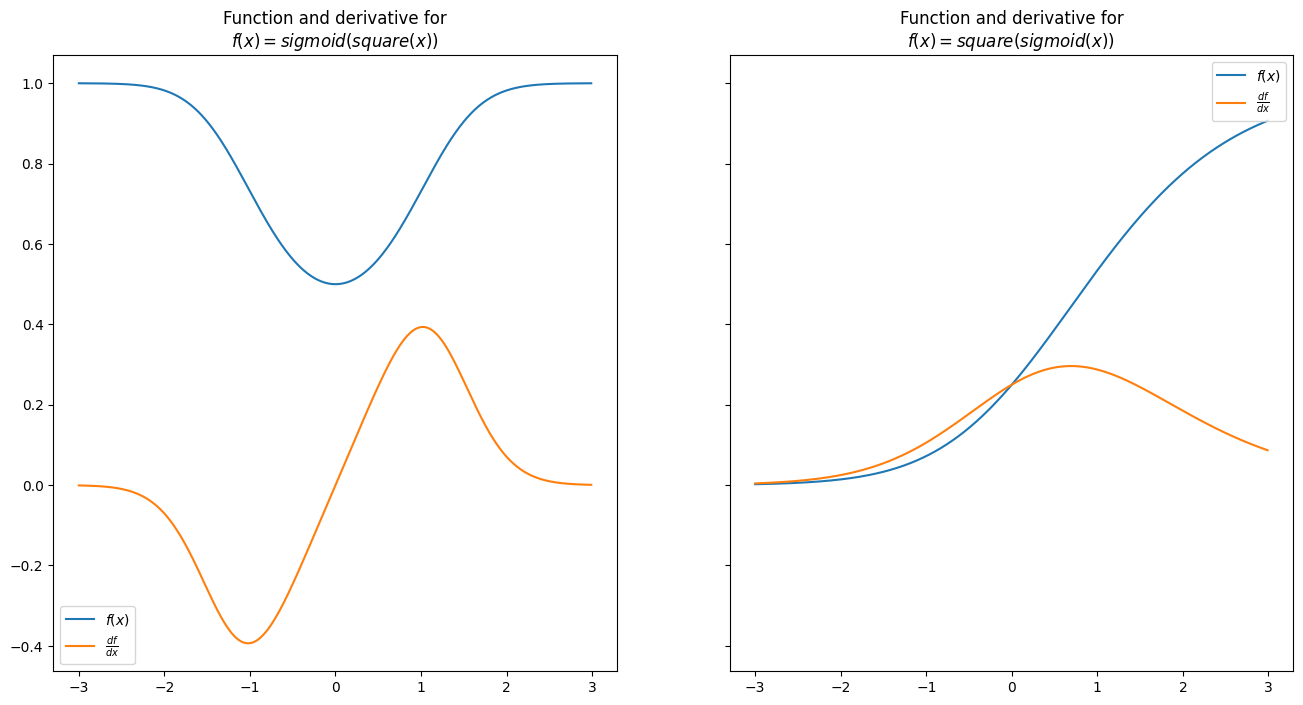

In [6]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
plot_range = np.arange(-3, 3, .01)

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

plot_chain(ax[0], chain_1, plot_range)
plot_chain(ax[1], chain_2, plot_range)
plot_chain_deriv(ax[0], chain_1, plot_range)
plot_chain_deriv(ax[1], chain_2, plot_range)
ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$")

plt.show()

## Chain of length 3

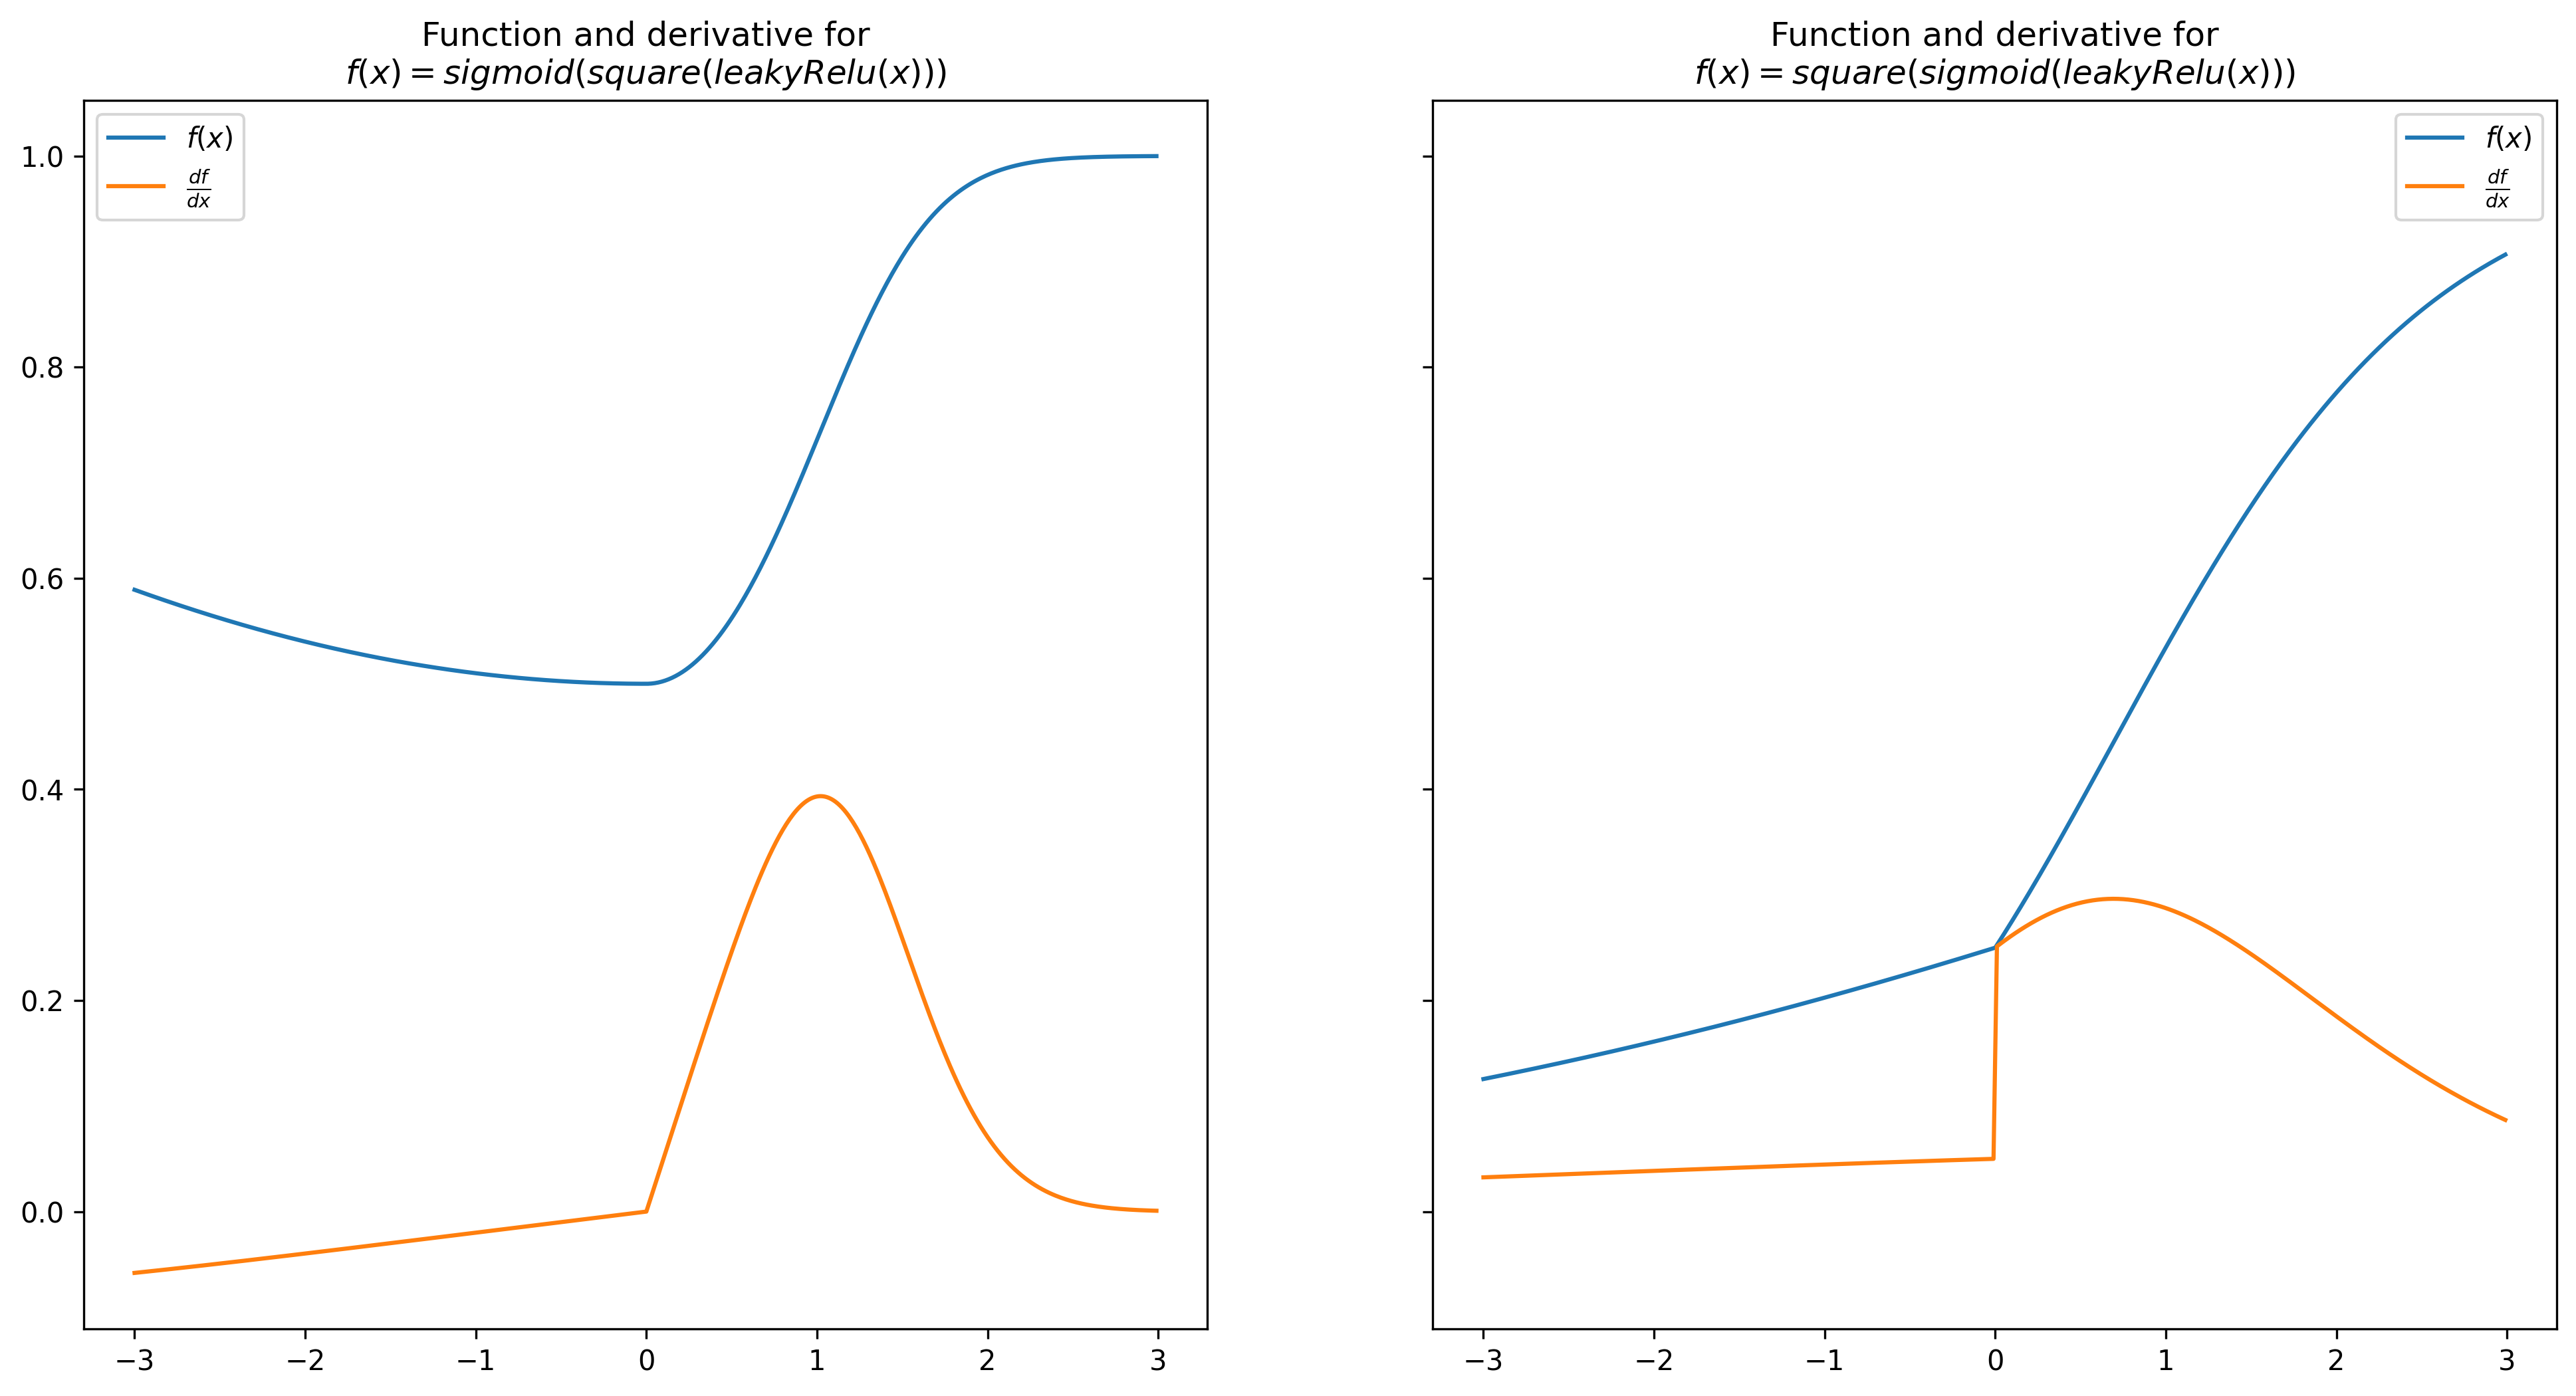

In [22]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

plot_chain(ax[0], chain_1, plot_range, length=3)
plot_chain(ax[1], chain_2, plot_range, length=3)
 
plot_chain_deriv(ax[0], chain_1, plot_range, length=3)
plot_chain_deriv(ax[1], chain_2, plot_range, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRelu(x)))$")

ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leakyRelu(x)))$")
plt.show()

## Function with multiple inputs example

## Function with matrix multiplication

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from ch1 import matmul_backward_first

In [5]:
np.random.seed(190203)

X = np.random.randn(1, 3)
W = np.random.randn(3, 1)
print(X)
print(W)
matmul_backward_first(X, W)

[[ 0.47231121  0.61514271 -1.72622715]]
[[ 0.92819676]
 [-0.60754888]
 [-1.22136052]]


array([[ 0.92819676, -0.60754888, -1.22136052]])

### 向量函数及其导数：后向传递

In [6]:
from ch1 import matrix_function_backward_1
from ch1 import sigmoid
matrix_function_backward_1(X, W, sigmoid)

array([[ 0.08516695, -0.05574581, -0.11206627]])

In [46]:
from ch1 import matrix_forward_extra
def forward_test(idx1, idx2, inc):
    X1 = X.copy()
    X1[idx1, idx2] = X[idx1, idx2] + inc
    return matrix_forward_extra(X1, W, sigmoid)

# 手动计算的导数，但是感觉有点问题，应该只能改变一个值才对
(forward_test(0, 2, 1e-6) - forward_test(0, 2, 0)) / 1e-6

array([[-0.11206632]])

In [43]:
from ch1 import matrix_function_backward_1
matrix_function_backward_1(X, W, sigmoid)

array([[ 0.08516695, -0.05574581, -0.11206627]])

上面的结果验证了我们的代码实际上是正确工作的

## 有趣的部分：后向传递

In [3]:
import numpy as np
from ch1 import sigmoid
from ch1 import matrix_function_forward_sum
from ch1 import matrix_function_backward_sum_1
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print('X:\n', X)
print('L:', round(matrix_function_forward_sum(X, W, sigmoid), 4))
print('dLdX:\n', matrix_function_backward_sum_1(X, W, sigmoid))


X:
 [[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]
L: 2.3755
dLdX:
 [[ 0.2488887  -0.37478057  0.01121962]
 [ 0.12604152 -0.27807404 -0.13945837]
 [ 0.22992798 -0.36623443 -0.02252592]]


In [8]:
X1 = X.copy()
X1[0, 0] += 1e-3
(matrix_function_forward_sum(X1, W, sigmoid) - matrix_function_forward_sum(X, W, sigmoid)) / 1e-3

0.24889684117601618

#### 额外的代码-作图

In [22]:
from numpy import ndarray
from typing import Callable
import matplotlib.pyplot as plt
Array_function = Callable[[ndarray], ndarray]

In [19]:
def matrix_function_forward_sum_plot(X:ndarray, W:ndarray, sigma:Array_function,
                                     modify_x11:bool = False, x11:float = .5)->float:
    assert X.shape[1] == W.shape[0]
    
    X1 = X.copy()
    
    if modify_x11:
        X1[0][0] = x11

    # matrix multiplication
    N = np.dot(X1, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [20]:
x11s = np.arange(X[0][0] - 1, X[0][0] + 1, .01)
Ls = [matrix_function_forward_sum_plot(X, W, sigmoid, modify_x11=True, x11=x11) for x11 in x11s]

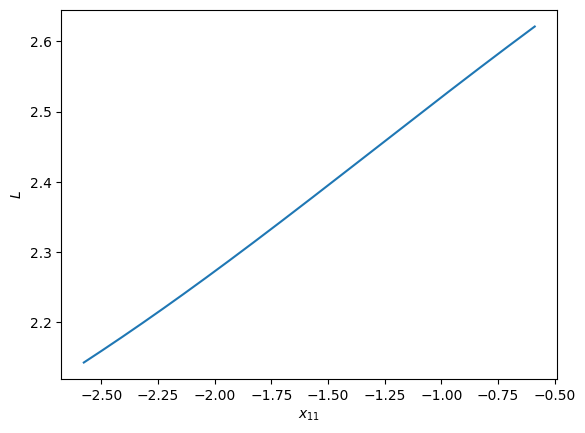

In [25]:
plt.plot(x11s, Ls)
plt.xlabel("$x_{11}$")
plt.ylabel("$L$")
plt.show()